# COMP30760 ASSIGNMENT 1
By Brian Byrne (18391933).

This is a visualization  and analysis of data collected from the "COVID-19 API" ([https://covid19api.com/]), a free API with data regarding the ever-growing Coronavirus infection rates. For the purpose of the assignment I decided to use the data of the following countries to draw interesting and comparable insights after careful consideration:
* <b>Ireland</b> - Most relevant to me personally as a resident and the country has recently entered lockdown, which may be a factor in the results.
* <b>Sweden</b> - Also an EU country, Sweden have decided against a traditional lockdown, in favour of a "Life must go on" policy. It will be interesting to see how there daily cases compare to Irelands. Swedens population is approx. twice that of Ireland.
* <b>Croatia</b> - is another EU counrty with a similar population to Ireland, this will be useful for comparison of cases and infection rates.

Furthermore, I have decided to focus solely on the dates of the dates in October, the most recent month available, as Ireland went into a level 5 (highest) lockdown during this month.

In [652]:
#importing of various relevant packages
import requests

In [653]:
import json

In [654]:
import pandas as pd

In [655]:
import matplotlib
import matplotlib.pyplot as plt

In [656]:
import math

In [657]:
import statistics

# DATA COLLECTION
Collection of various datasets from specified urls using get calls. The datasets are then saved to their own individual <b>JSON</b> files.

In [658]:
#Saving of Irish data
irel_url = "https://api.covid19api.com/country/ireland/status/confirmed?from=2020-10-01T00:00:00Z&to=2020-10-31T00:00:00Z"
irel_data_raw = requests.get(irel_url)

#Checking to make sure the data has been retrieved properly ( should return 200)
print(irel_data_raw.status_code)

#saving the Irish covid data to a json file
ireland_covid_file = open("ireland.json", "w")
ireland_covid_file.write(irel_data_raw.text)
ireland_covid_file.close()

200


In [659]:
#Saving of Swedish data
swed_url = "https://api.covid19api.com/country/sweden/status/confirmed?from=2020-10-01T00:00:00Z&to=2020-10-31T00:00:00Z"
swed_data_raw = requests.get(swed_url)

print(swed_data_raw.status_code)

#saving the Swedish covid data to a json file
sweden_covid_file = open("sweden.json", "w")
sweden_covid_file.write(swed_data_raw.text)
sweden_covid_file.close()

200


In [660]:
#Saving of Croatian data
cro_url = "https://api.covid19api.com/country/croatia/status/confirmed?from=2020-10-01T00:00:00Z&to=2020-10-31T00:00:00Z"
cro_data_raw = requests.get(cro_url)

print(cro_data_raw.status_code)

#saving the Swedish covid data to a json file
cro_covid_file = open("croatia.json", "w")
cro_covid_file.write(cro_data_raw.text)
cro_covid_file.close()

200


# DATA PREPARATION

## Loading of Data
Loading the various <b>JSON</b> files for cleaning and filtering

In [661]:
#Loading the Irish, Swedish and Croatian datasets
load_ire= open("ireland.json",)
irish_data=json.load(load_ire)
load_ire.close()

load_swe= open("sweden.json",)
swedish_data= json.load(load_swe)
load_swe.close()

load_cro= open("croatia.json",)
croatian_data= json.load(load_cro)
load_cro.close()

type(swedish_data)

list

Here we will use the <b>Pandas</b> Library to represent the raw, uncleaned data we have collected from our API

In [662]:
#Applying Pandas to prepare show loaded data
irish_table= pd.DataFrame(irish_data)
swedish_table= pd.DataFrame(swedish_data)
croatian_table= pd.DataFrame(croatian_data)


print("Irish Data")
irish_table

Irish Data


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Ireland,IE,,,,53.41,-8.24,36597,confirmed,2020-10-01T00:00:00Z
1,Ireland,IE,,,,53.41,-8.24,37063,confirmed,2020-10-02T00:00:00Z
2,Ireland,IE,,,,53.41,-8.24,37668,confirmed,2020-10-03T00:00:00Z
3,Ireland,IE,,,,53.41,-8.24,38032,confirmed,2020-10-04T00:00:00Z
4,Ireland,IE,,,,53.41,-8.24,38549,confirmed,2020-10-05T00:00:00Z
5,Ireland,IE,,,,53.41,-8.24,38973,confirmed,2020-10-06T00:00:00Z
6,Ireland,IE,,,,53.41,-8.24,39584,confirmed,2020-10-07T00:00:00Z
7,Ireland,IE,,,,53.41,-8.24,40086,confirmed,2020-10-08T00:00:00Z
8,Ireland,IE,,,,53.41,-8.24,40703,confirmed,2020-10-09T00:00:00Z
9,Ireland,IE,,,,53.41,-8.24,41714,confirmed,2020-10-10T00:00:00Z


In [663]:
print("Swedish Data")
swedish_table

Swedish Data


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Sweden,SE,,,,60.13,18.64,93615,confirmed,2020-10-01T00:00:00Z
1,Sweden,SE,,,,60.13,18.64,94283,confirmed,2020-10-02T00:00:00Z
2,Sweden,SE,,,,60.13,18.64,94283,confirmed,2020-10-03T00:00:00Z
3,Sweden,SE,,,,60.13,18.64,94283,confirmed,2020-10-04T00:00:00Z
4,Sweden,SE,,,,60.13,18.64,94283,confirmed,2020-10-05T00:00:00Z
5,Sweden,SE,,,,60.13,18.64,96145,confirmed,2020-10-06T00:00:00Z
6,Sweden,SE,,,,60.13,18.64,96677,confirmed,2020-10-07T00:00:00Z
7,Sweden,SE,,,,60.13,18.64,97532,confirmed,2020-10-08T00:00:00Z
8,Sweden,SE,,,,60.13,18.64,98451,confirmed,2020-10-09T00:00:00Z
9,Sweden,SE,,,,60.13,18.64,98451,confirmed,2020-10-10T00:00:00Z


In [664]:
print("Croatian Data")
croatian_table

Croatian Data


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Croatia,HR,,,,45.1,15.2,16827,confirmed,2020-10-01T00:00:00Z
1,Croatia,HR,,,,45.1,15.2,17160,confirmed,2020-10-02T00:00:00Z
2,Croatia,HR,,,,45.1,15.2,17401,confirmed,2020-10-03T00:00:00Z
3,Croatia,HR,,,,45.1,15.2,17659,confirmed,2020-10-04T00:00:00Z
4,Croatia,HR,,,,45.1,15.2,17797,confirmed,2020-10-05T00:00:00Z
5,Croatia,HR,,,,45.1,15.2,18084,confirmed,2020-10-06T00:00:00Z
6,Croatia,HR,,,,45.1,15.2,18447,confirmed,2020-10-07T00:00:00Z
7,Croatia,HR,,,,45.1,15.2,18989,confirmed,2020-10-08T00:00:00Z
8,Croatia,HR,,,,45.1,15.2,19446,confirmed,2020-10-09T00:00:00Z
9,Croatia,HR,,,,45.1,15.2,19932,confirmed,2020-10-10T00:00:00Z


# DATA PREPROCESSING
Necessary cleaning and filtering of the collected data to eliminate missing or irrelevant data.

As we can see from our above tables most of the columns are either empty or show arbitrary data. For this reason we will remove them to avoid complications.

<b>Note:</b> All cases in the collected data have a "Confirmed" status.

In [665]:
#Function to remove unused and useless columns
def removeUnused(data):
    for day in data:
         del day["Province"]
         del day["City"]
         del day["CityCode"]
         del day["CountryCode"]
         del day["Lat"]
         del day["Lon"]
         del day["Status"]
        

The <b>times</b> shown in the Time column are all fixed. This function cuts the string down to just the relevant date

In [666]:
#Function to display the dates in a tidier manner
def dateCorrector(date):
    new_date=date[0:10]
    return new_date
    

Calling of data preprocessing functions

In [667]:
#Here we will remove unused columns
removeUnused(irish_data)
removeUnused(swedish_data)
removeUnused(croatian_data)

In [668]:
#Tidying up of dates
for day in irish_data:
    day["Date"]=dateCorrector(day["Date"])
    
for day in swedish_data:
    day["Date"]=dateCorrector(day["Date"])
    
for day in croatian_data:
    day["Date"]=dateCorrector(day["Date"])
    

Converting the cases from type <b>STRING</b> to type <b>INT</b>

In [669]:
#Function to convert cases to type int
def intConversion(x):
    return int(x)
    

In [670]:
#Conversion of cases data to type interger from string
for day in irish_data:
    day["Cases"]= intConversion(day["Cases"])
    
for day in swedish_data:
    day["Cases"]= intConversion(day["Cases"])
    
for day in croatian_data:
    day["Cases"]= intConversion(day["Cases"])

Organising data into lists for easier visualization.

In [639]:
#Splitting up the data in to seperate lists for visualization 

irish_cases=[]
irish_dates=[]

swedish_cases=[]
swedish_dates=[]

croatian_cases=[]
croatian_dates=[]

for day in irish_data:
    irish_cases.append(day["Cases"])

for day in irish_data:
    irish_dates.append(day["Date"])
    
for day in swedish_data:
    swedish_cases.append(day["Cases"])

for day in swedish_data:
    swedish_dates.append(day["Date"])
    
for day in croatian_data:
    croatian_cases.append(day["Cases"])

for day in croatian_data:
    croatian_dates.append(day["Date"])


In [651]:
#A useful dictionary of all our data in one place
combined_data = {"Dates":irish_dates,"Ireland":irish_cases, "Sweden":swedish_cases, "Croatia":croatian_cases}

,Dates,Ireland,Sweden,Croatia
0,2020-10-01,36597,93615,16827
1,2020-10-02,37063,94283,17160
2,2020-10-03,37668,94283,17401
3,2020-10-04,38032,94283,17659
4,2020-10-05,38549,94283,17797
5,2020-10-06,38973,96145,18084
6,2020-10-07,39584,96677,18447
7,2020-10-08,40086,97532,18989
8,2020-10-09,40703,98451,19446
9,2020-10-10,41714,98451,19932


Rounding functions for applying limits to the size of graphs

In [611]:
def roundUp(x):
    return int(math.ceil(x / 10000.0)) * 10000

In [612]:
def roundDown(x):
    return int(math.floor(x / 10000.0)) * 10000

## Calculations
Some simple useful computations 

In [613]:
#Finding the max and mins of the data
max_irish_cases=max(irish_cases)
min_irish_cases=min(irish_cases)

max_swedish_cases=max(swedish_cases)
min_swedish_cases=min(swedish_cases)

max_croatian_cases=max(croatian_cases)
min_croatian_cases=min(croatian_cases)

#Based on populations (Croatia<Ireland<Sweden)
upper_cases_limit=roundUp(max_swedish_cases)
lower_cases_limit=roundDown(min_croatian_cases)

In [614]:
#Averages
irish_average_cases = statistics.mean(irish_cases)
swedish_average_cases = statistics.mean(swedish_cases)
croatian_average_cases = statistics.mean(croatian_cases)

#Simultaneous lists of average cases and countries
avg_cases=[irish_average_cases,swedish_average_cases,croatian_average_cases]
countries=[irish_data[0]["Country"],swedish_data[0]["Country"],croatian_data[0]["Country"]]

# Part 1: Ireland


## Irish Daily Covid Cases

In [617]:
#This part is an analysis of the Irish Covid Statistics in October
clean_irish_table = pd.DataFrame(irish_data)
clean_irish_table

,Country,Cases,Date
0,Ireland,36597,2020-10-01
1,Ireland,37063,2020-10-02
2,Ireland,37668,2020-10-03
3,Ireland,38032,2020-10-04
4,Ireland,38549,2020-10-05
5,Ireland,38973,2020-10-06
6,Ireland,39584,2020-10-07
7,Ireland,40086,2020-10-08
8,Ireland,40703,2020-10-09
9,Ireland,41714,2020-10-10


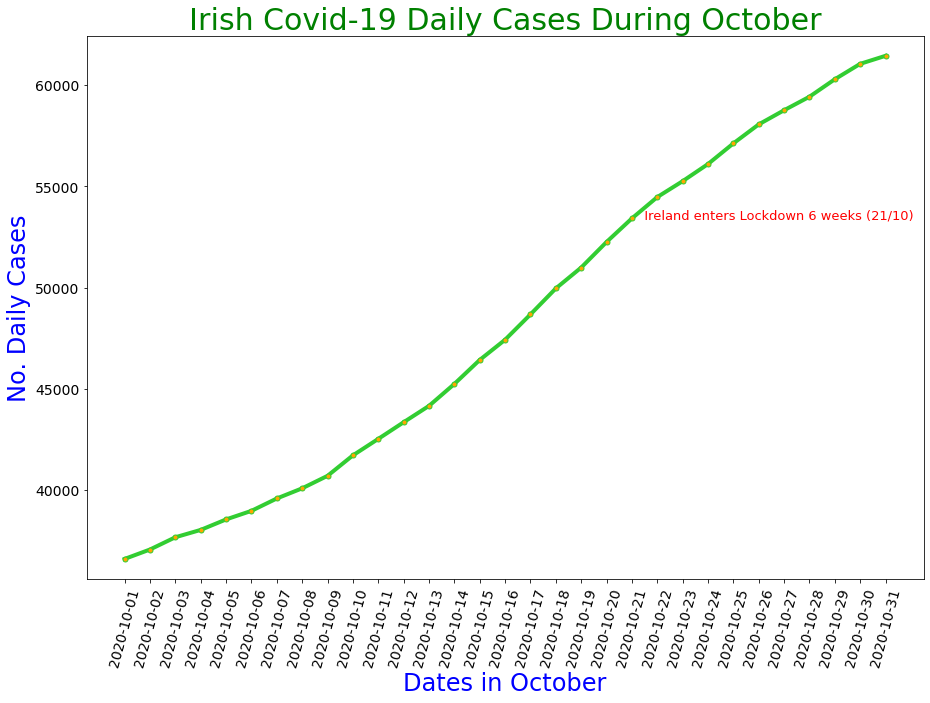

In [618]:
plt.figure(figsize=(15,10))
plt.plot(irish_dates,irish_cases, color= "limegreen", linewidth=4, marker="o", markersize=5, markerfacecolor="orange")
plt.title("Irish Covid-19 Daily Cases During October", fontsize=30, color="green")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(min_irish_cases-1000,max_irish_cases+1000)
plt.xlabel('Dates in October', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")


# text is left-aligned
plt.text(irish_dates[lockdown_int],irish_cases[lockdown_int],"   Ireland enters Lockdown 6 weeks (21/10)",  fontsize=13, color="red")
plt.show()

The rise in the Irish number of cases

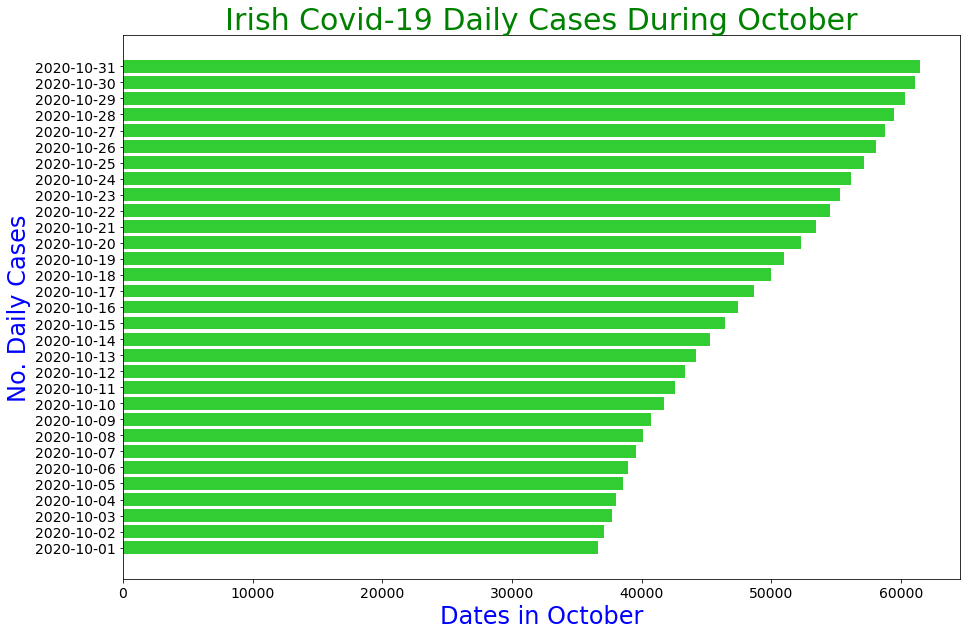

In [619]:
plt.figure(figsize=(15,10))
# set up the bar chart
plt.barh(irish_dates, irish_cases, align='center', color="limegreen")
plt.title("Irish Covid-19 Daily Cases During October", fontsize=30, color="green")
plt.xlabel('Dates in October', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()

In [536]:
clean_swedish_table = pd.DataFrame(swedish_data)
print("Tidied up Irish Data")
clean_swedish_table

Tidied up Irish Data


,Country,Cases,Date
0,Sweden,93615,2020-10-01
1,Sweden,94283,2020-10-02
2,Sweden,94283,2020-10-03
3,Sweden,94283,2020-10-04
4,Sweden,94283,2020-10-05
5,Sweden,96145,2020-10-06
6,Sweden,96677,2020-10-07
7,Sweden,97532,2020-10-08
8,Sweden,98451,2020-10-09
9,Sweden,98451,2020-10-10


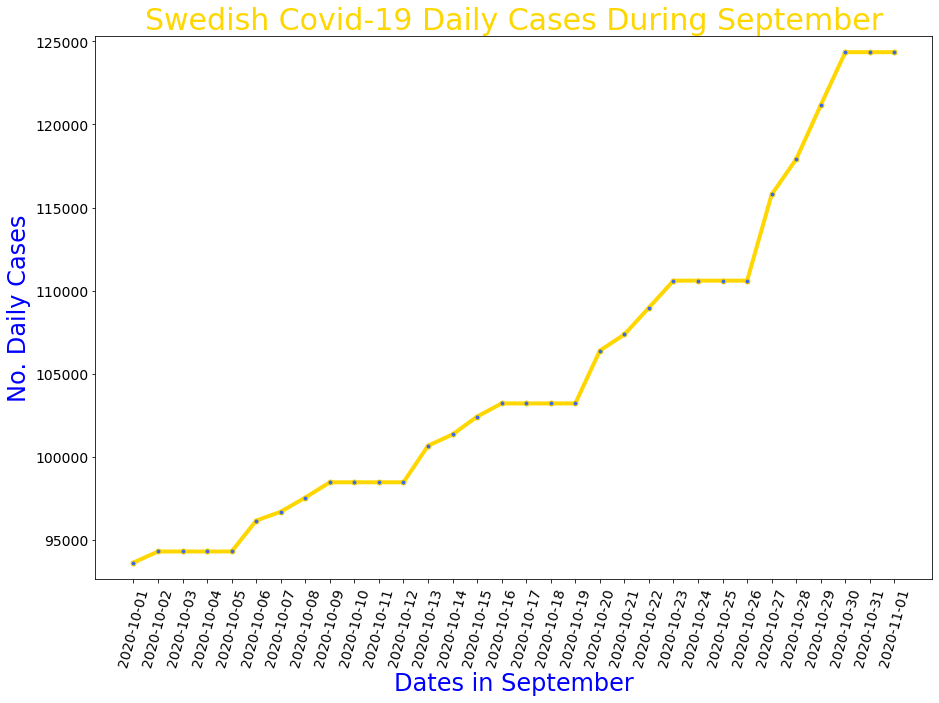

In [478]:
plt.figure(figsize=(15,10))
plt.plot(swedish_dates,swedish_cases,color= "gold", linewidth=4, marker="o", markersize=5, markerfacecolor="royalblue")
plt.title("Swedish Covid-19 Daily Cases During September", fontsize=30, color="gold")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(min_swedish_cases-1000, max_swedish_cases+1000)
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")

plt.show()

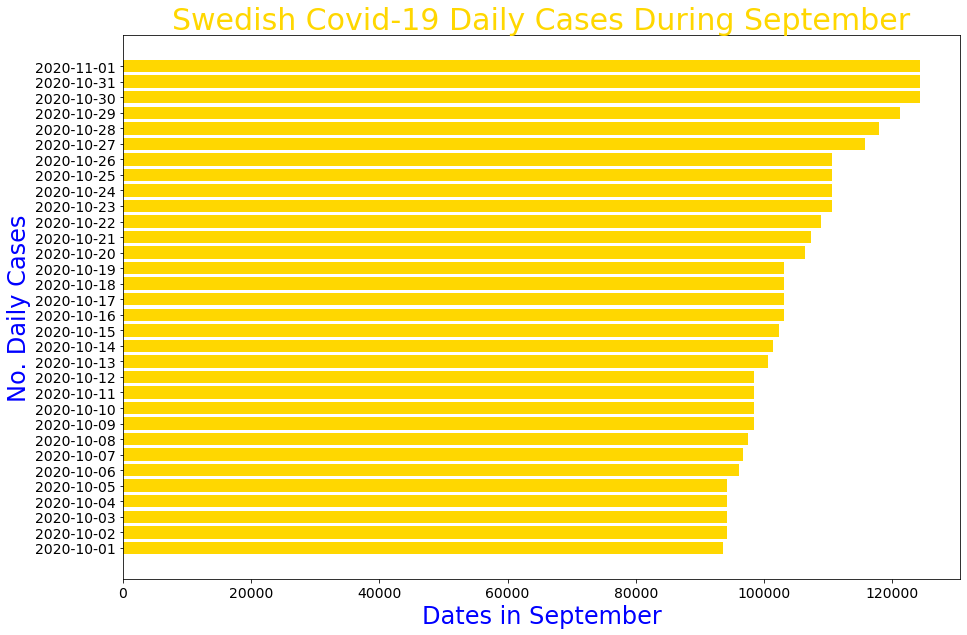

In [479]:
plt.figure(figsize=(15,10))
# set up the bar chart
plt.barh(swedish_dates, swedish_cases, align='center', color="gold")
plt.title("Swedish Covid-19 Daily Cases During September", fontsize=30, color="gold")
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()

In [538]:
clean_croatian_table = pd.DataFrame(croatian_data)
print("Tidied up Croatian Data")
clean_croatian_table

Tidied up Croatian Data


,Country,Cases,Date
0,Croatia,16827,2020-10-01
1,Croatia,17160,2020-10-02
2,Croatia,17401,2020-10-03
3,Croatia,17659,2020-10-04
4,Croatia,17797,2020-10-05
5,Croatia,18084,2020-10-06
6,Croatia,18447,2020-10-07
7,Croatia,18989,2020-10-08
8,Croatia,19446,2020-10-09
9,Croatia,19932,2020-10-10


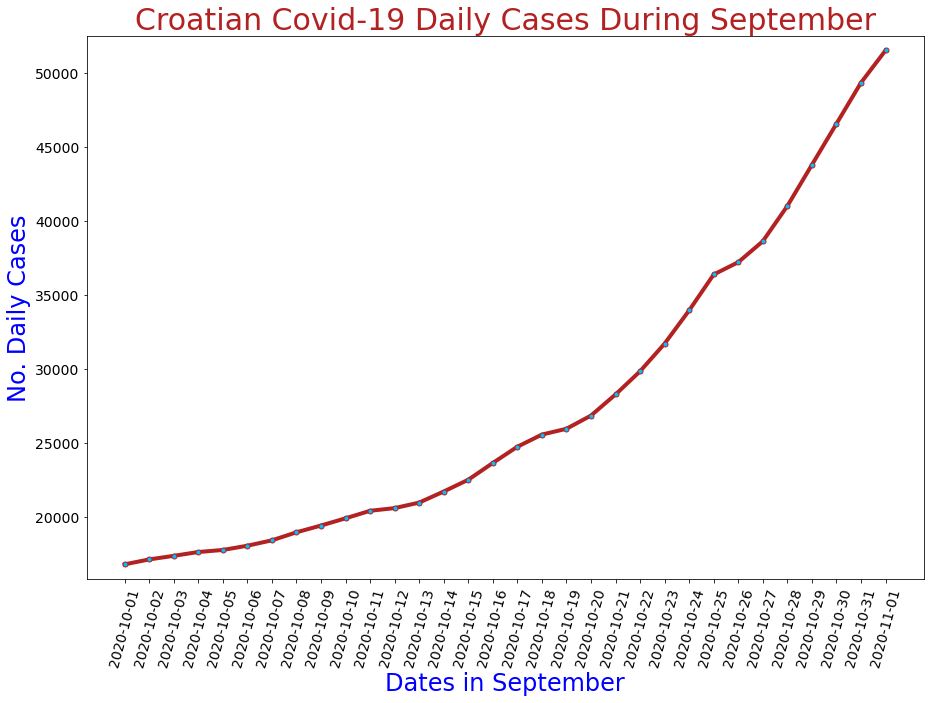

In [480]:
plt.figure(figsize=(15,10))
plt.plot(croatian_dates,croatian_cases,color= "firebrick", linewidth=4, marker="o", markersize=5, markerfacecolor="deepskyblue")
plt.title("Croatian Covid-19 Daily Cases During September", fontsize=30, color="firebrick")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(min_croatian_cases-1000, max_croatian_cases+1000)
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")

plt.show()

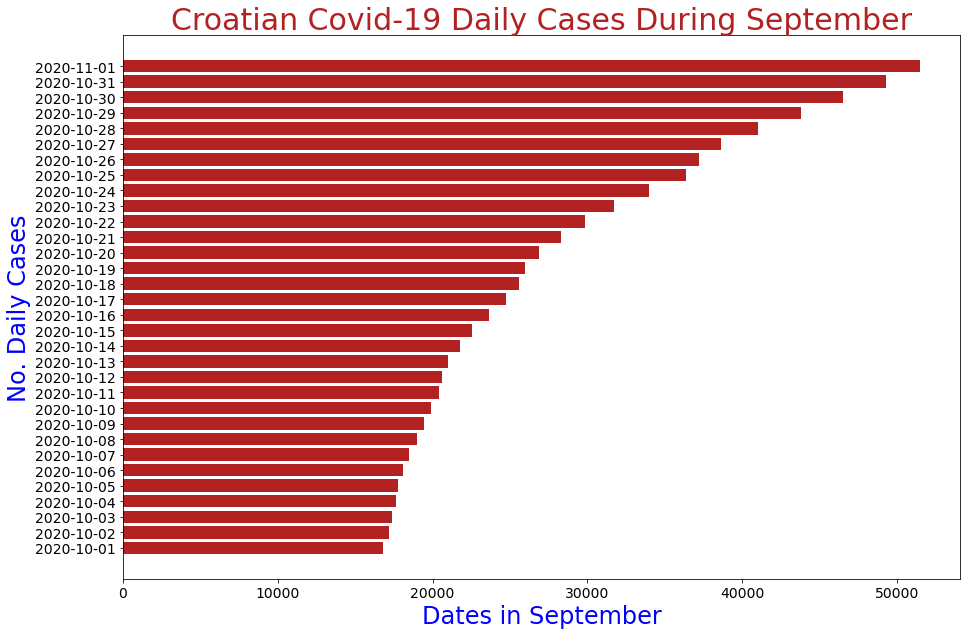

In [481]:
plt.figure(figsize=(15,10))
# set up the bar chart
plt.barh(croatian_dates, croatian_cases, align='center', color="firebrick")
plt.title("Croatian Covid-19 Daily Cases During September", fontsize=30, color="firebrick")
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()

In [671]:
combined_table = pd.DataFrame(combined_data)
combined_table

,Dates,Ireland,Sweden,Croatia
0,2020-10-01,36597,93615,16827
1,2020-10-02,37063,94283,17160
2,2020-10-03,37668,94283,17401
3,2020-10-04,38032,94283,17659
4,2020-10-05,38549,94283,17797
5,2020-10-06,38973,96145,18084
6,2020-10-07,39584,96677,18447
7,2020-10-08,40086,97532,18989
8,2020-10-09,40703,98451,19446
9,2020-10-10,41714,98451,19932


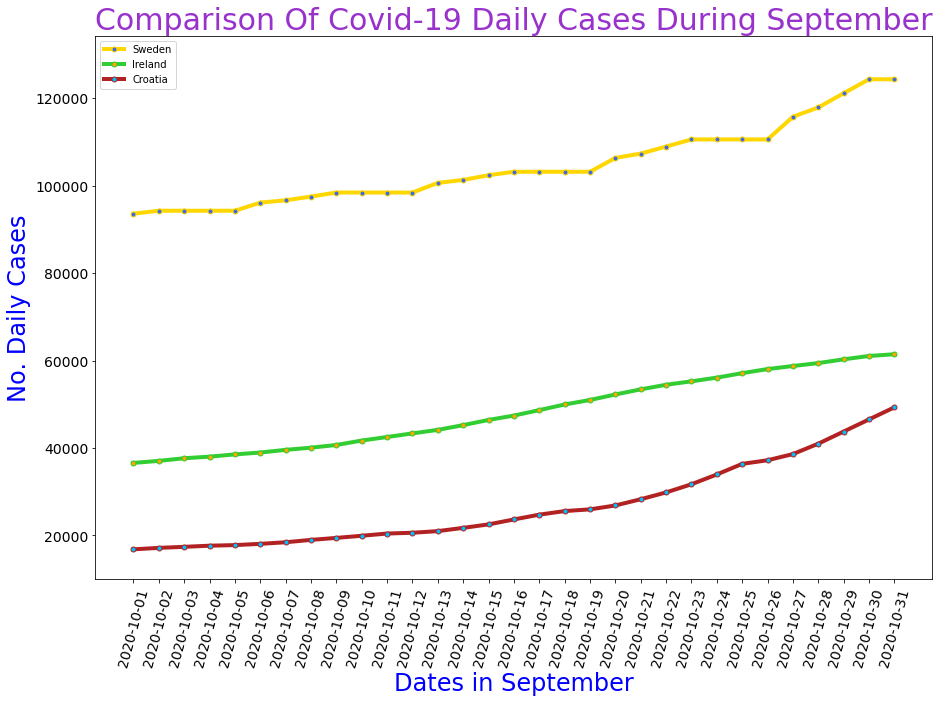

In [672]:
plt.figure(figsize=(15,10))
plt.plot(swedish_dates,swedish_cases,color= "gold", linewidth=4, marker="o", markersize=5, markerfacecolor="royalblue")
plt.plot(irish_dates,irish_cases,color= "limegreen", linewidth=4,marker="o", markersize=5, markerfacecolor="orange")
plt.plot(croatian_dates,croatian_cases,color= "firebrick", linewidth=4,  marker="o", markersize=5, markerfacecolor="deepskyblue")
plt.title("Comparison Of Covid-19 Daily Cases During October", fontsize=30, color="darkorchid")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(lower_cases_limit, max_swedish_cases+10000)
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")

plt.gca().legend(("Sweden","Ireland","Croatia"))

plt.show()

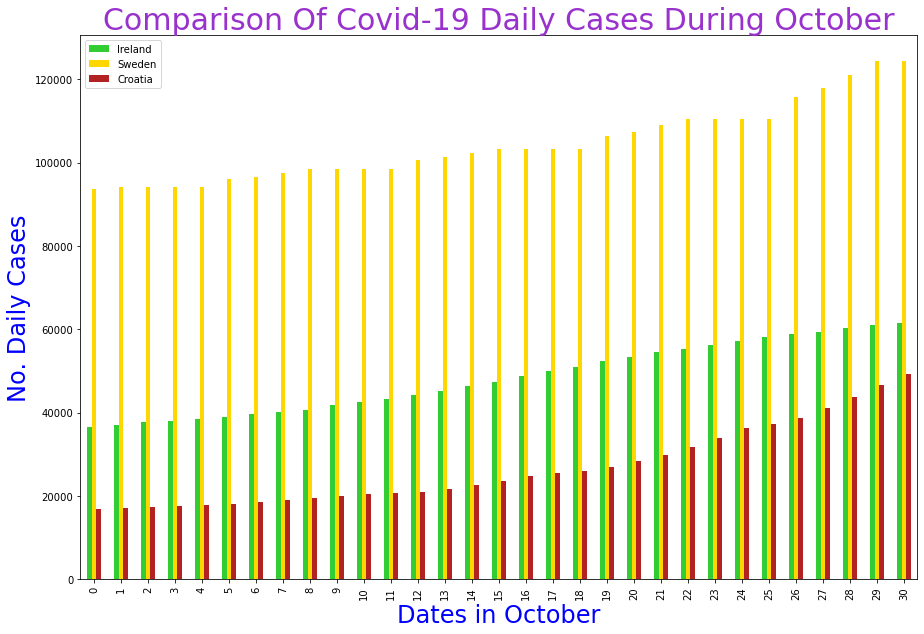

In [690]:
p=combined_table.plot.bar(figsize=(15, 10), color=["limegreen","gold","firebrick"])

p.set_xlabel('Dates in October', fontsize=24,color="blue")
p.set_ylabel('No. Daily Cases', fontsize=24,color="blue")
p.set_title("Comparison Of Covid-19 Daily Cases During October", fontsize=30, color="darkorchid")
# move the legend to outside the plot

p

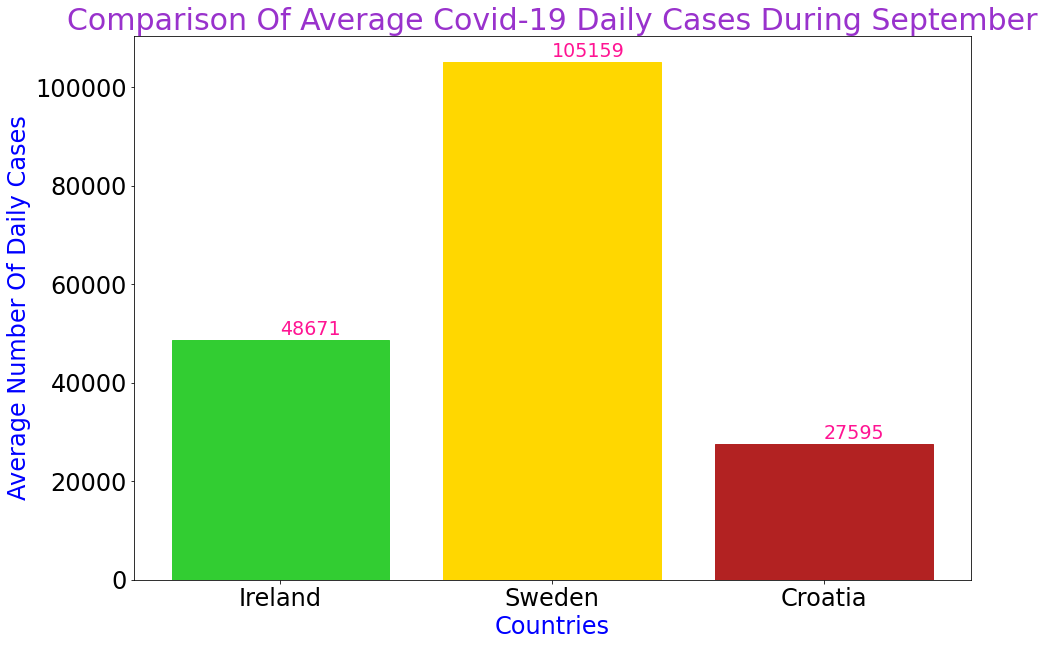

In [483]:
plt.figure(figsize=(15,10))
# set up the bar chart
barlist=plt.bar(countries, avg_cases)
plt.title("Comparison Of Average Covid-19 Daily Cases During September", fontsize=30, color="darkorchid")
barlist[0].set_color("limegreen")
barlist[1].set_color("gold")
barlist[2].set_color("firebrick")
plt.ylabel("Average Number Of Daily Cases", fontsize=24, color="blue")
plt.xlabel("Countries", fontsize=24, color="blue")
# increase the font sizes on the axes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

for i in range(len(countries)):
    plt.annotate(int(avg_cases[i]), xy=(countries[i],avg_cases[i]+1000),fontsize=19,color="deeppink" )
   


plt.show()


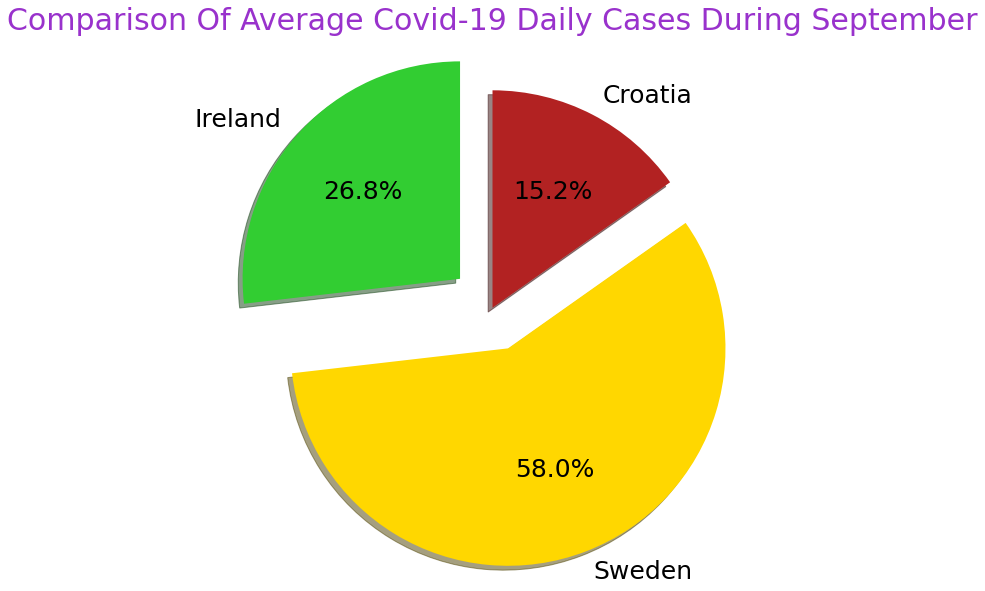

In [484]:
plt.figure(figsize=(10,10))
plt.title("Comparison Of Average Covid-19 Daily Cases During September", fontsize=30, color="darkorchid")
explode = (0.2, 0.2,0)
# create the pie chart on the sample data
p = plt.pie(avg_cases, explode=explode, labels=countries, colors=["limegreen","gold","firebrick"], autopct="%.1f%%",
           shadow=True, startangle=90,textprops={'fontsize': 25})
plt.show()

In [487]:
#Face-to-face Ireland and Croatia

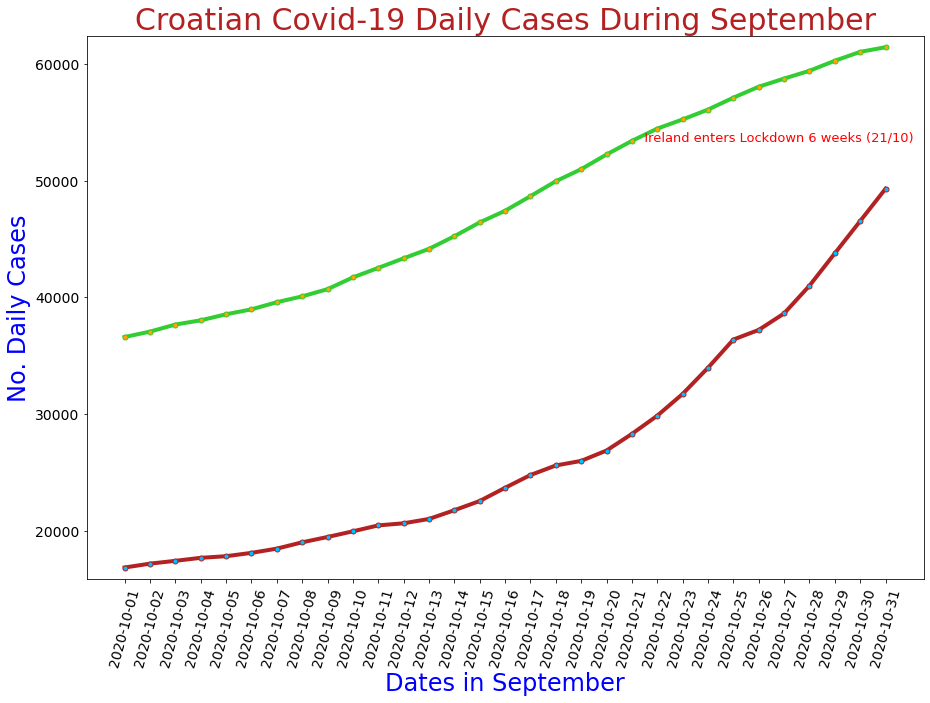

In [685]:
plt.figure(figsize=(15,10))
plt.plot(irish_dates,irish_cases, color= "limegreen", linewidth=4, marker="o", markersize=5, markerfacecolor="orange")
plt.title("Croatian Covid-19 Daily Cases During September", fontsize=30, color="firebrick")
plt.plot(croatian_dates,croatian_cases,color= "firebrick", linewidth=4,  marker="o", markersize=5, markerfacecolor="deepskyblue")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(min_croatian_cases-1000,max_irish_cases+1000)
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")


# text is left-aligned
plt.text(irish_dates[lockdown_int],irish_cases[lockdown_int],"   Ireland enters Lockdown 6 weeks (21/10)",  fontsize=13, color="red")
plt.show()

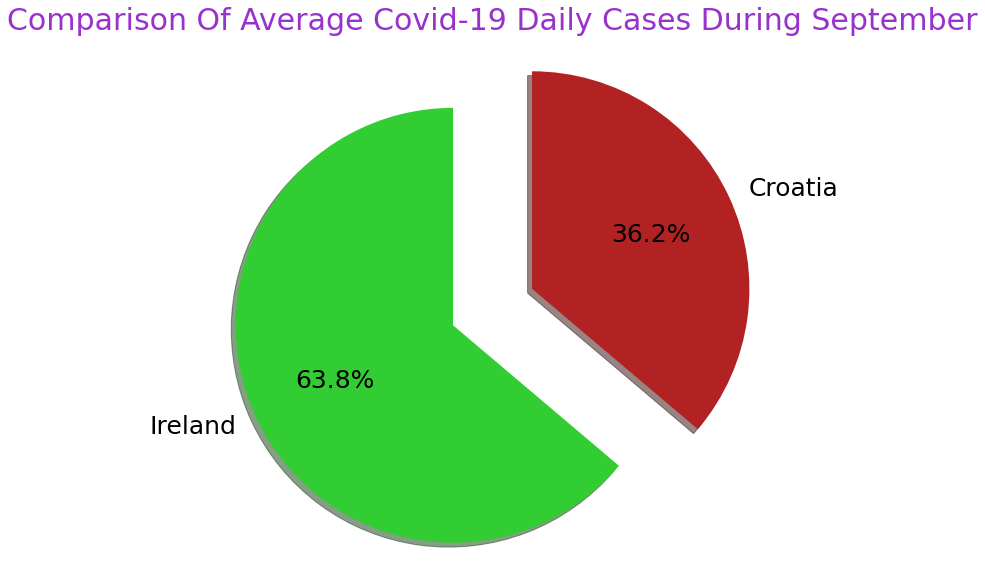

In [489]:
countries.remove("Sweden")
avg_cases.remove(swedish_average_cases)

plt.figure(figsize=(10,10))
plt.title("Comparison Of Average Covid-19 Daily Cases During September", fontsize=30, color="darkorchid")
explode = (0.2, 0.2)
# create the pie chart on the sample data
p = plt.pie(avg_cases, explode=explode, labels=countries, colors=["limegreen","firebrick"], autopct="%.1f%%",
           shadow=True, startangle=90,textprops={'fontsize': 25})
plt.show()

In [691]:
proportianate_swedish_cases = [i / 2 for i in swedish_cases]

In [ ]:
updated_combined_table = pd.DataFrame(combined_data)
combined_table

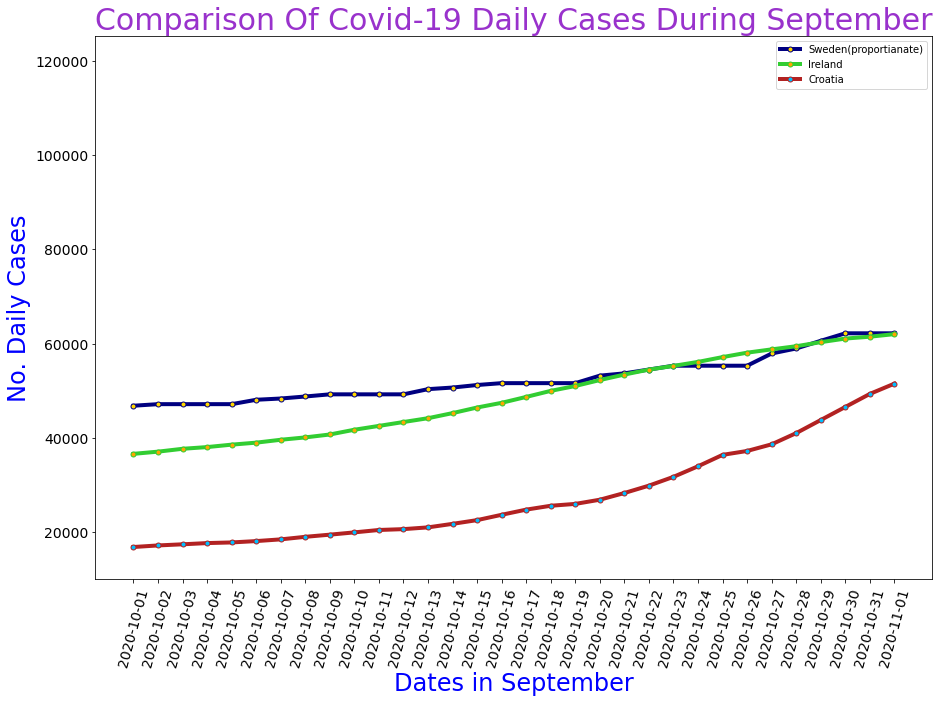

In [486]:
plt.figure(figsize=(15,10))
plt.plot(swedish_dates,proportianate_swedish_cases,color= "navy", linewidth=4, marker="o", markersize=5, markerfacecolor="gold")
plt.plot(irish_dates,irish_cases,color= "limegreen", linewidth=4,marker="o", markersize=5, markerfacecolor="orange")
plt.plot(croatian_dates,croatian_cases,color= "firebrick", linewidth=4,  marker="o", markersize=5, markerfacecolor="deepskyblue")
plt.title("Comparison Of Covid-19 Daily Cases During September", fontsize=30, color="darkorchid")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(lower_cases_limit, max_swedish_cases+1000)
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")

plt.gca().legend(("Sweden(proportianate)","Ireland","Croatia"))

plt.show()